In [88]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


mouse_datafile = "data/mouse_drug_data.csv"
clinical_datafile = "data/clinicaltrial_data.csv"

mouse_data = pd.read_csv(mouse_datafile)
clinical_data = pd.read_csv(clinical_datafile)

In [89]:
mouse_data.head(10)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn
5,o848,Stelasyn
6,z314,Stelasyn
7,g989,Stelasyn
8,m269,Stelasyn
9,a963,Stelasyn


In [90]:
clinical_data.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
5,h246,0,45.0,0
6,p189,0,45.0,0
7,n923,0,45.0,0
8,q119,0,45.0,0
9,f993,0,45.0,0


In [91]:
combined_data = pd.merge(mouse_data, clinical_data, how ="outer", on="Mouse ID")
combined_data.head(10)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [93]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
grouped_data = combined_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
grouped_meanV = grouped_data.mean()
grouped_dfV = pd.DataFrame(grouped_meanV)
grouped_dfV.reset_index(level = None, inplace = True)
grouped_dfV.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [94]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
grouped_data = combined_data.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
st_errorV = grouped_data.sem()
st_errorV = pd.DataFrame(st_errorV)
st_errorV.reset_index(level = None, inplace = True)
st_errorV.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [114]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
pivot_tableV = grouped_dfV.pivot_table(index ="Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
pivot_tableV.reset_index(level = None, inplace = True)
pivot_tableV.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


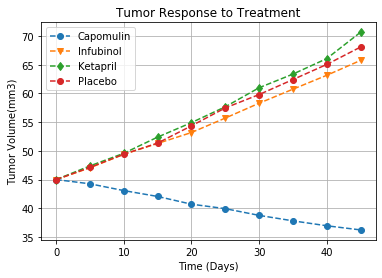

In [115]:
plt.figure()
#fig=table_fourdrugs.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o',yerr = Capomulin_error);
plt.errorbar(x=pivot_tableV['Timepoint'],y=pivot_tableV['Capomulin'],label='Capomulin', yerr=None, linestyle="--", fmt='o', )
plt.errorbar(x=pivot_tableV['Timepoint'],y=pivot_tableV['Infubinol'], label='Infubinol', yerr=None, linestyle="--", fmt='v')
plt.errorbar(x=pivot_tableV['Timepoint'],y=pivot_tableV['Ketapril'], label='Ketapril', yerr=None, linestyle="--",fmt='d')
plt.errorbar(x=pivot_tableV['Timepoint'],y=pivot_tableV['Placebo'],label="Placebo", yerr=None, linestyle="--", fmt='o')
plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.legend(loc="best")
plt.grid()
plt.legend()
plt.show()

## Metastatic Response to Treatment

In [118]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
grouped_met = combined_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
grouped_metmean = grouped_met.mean()
groupmet_df = pd.DataFrame(grouped_metmean)
groupmet_df.reset_index(level = None, inplace = True)
groupmet_df.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [119]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
grouped_met = combined_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"]
st_errorM = grouped_met.sem()
st_errorM = pd.DataFrame(st_errorM)
st_errorM.reset_index(level = None, inplace = True)
st_errorM.head(10)

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
5,Capomulin,25,0.181818
6,Capomulin,30,0.172944
7,Capomulin,35,0.169496
8,Capomulin,40,0.175610
9,Capomulin,45,0.202591


In [120]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
pivot_tableM = groupmet_df.pivot_table(index ="Timepoint", columns = "Drug", values = "Metastatic Sites")
pivot_tableM.reset_index(level = None, inplace = True)
pivot_tableM.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


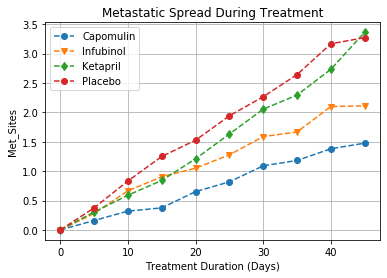

In [122]:
plt.figure()
#fig=table_fourdrugs.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o',yerr = Capomulin_error);
plt.errorbar(x=pivot_tableM['Timepoint'],y=pivot_tableM['Capomulin'],label='Capomulin', yerr=None, linestyle="--", fmt='o', )
plt.errorbar(x=pivot_tableM['Timepoint'],y=pivot_tableM['Infubinol'], label='Infubinol', yerr=None, linestyle="--", fmt='v')
plt.errorbar(x=pivot_tableM['Timepoint'],y=pivot_tableM['Ketapril'], label='Ketapril', yerr=None, linestyle="--",fmt='d')
plt.errorbar(x=pivot_tableM['Timepoint'],y=pivot_tableM['Placebo'],label="Placebo", yerr=None, linestyle="--", fmt='o')
plt.ylabel('Met_Sites')
plt.xlabel('Treatment Duration (Days)')
plt.title('Metastatic Spread During Treatment')
plt.legend(loc="best")
plt.grid()
plt.legend()
plt.show()

## Survival Rates

In [131]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_data.groupby(["Drug", "Timepoint"]).count()
mice_count_df = pd.DataFrame(mice_count["Mouse ID"])
mice_count_df.reset_index(inplace=True)
mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [133]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
pivot_mouse = mice_count_df.pivot_table(index ="Timepoint", columns = "Drug", values = "Mouse ID")
pivot_mouse.reset_index(level = None, inplace = True)
pivot_mouse

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


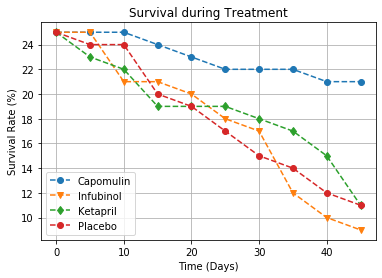

In [135]:
# Generate the Plot (Accounting for percentages)
# Show the Figure
plt.figure()
#fig=table_fourdrugs.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o',yerr = Capomulin_error);
plt.errorbar(x=pivot_mouse['Timepoint'],y=pivot_mouse['Capomulin'],label='Capomulin', yerr=None, linestyle="--", fmt='o', )
plt.errorbar(x=pivot_mouse['Timepoint'],y=pivot_mouse['Infubinol'], label='Infubinol', yerr=None, linestyle="--", fmt='v')
plt.errorbar(x=pivot_mouse['Timepoint'],y=pivot_mouse['Ketapril'], label='Ketapril', yerr=None, linestyle="--",fmt='d')
plt.errorbar(x=pivot_mouse['Timepoint'],y=pivot_mouse['Placebo'],label="Placebo", yerr=None, linestyle="--", fmt='o')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Time (Days)')
plt.title('Survival during Treatment')
plt.legend(loc="best")
plt.grid()
plt.legend()
plt.show()

## Summary Bar Graph

In [142]:
# Calculate the percent changes for each drug
# Display the data to confirm
capo_tumorchange = (pivot_tableV["Capomulin"][9] - pivot_tableV["Capomulin"][0]) / pivot_tableV["Capomulin"][0] * 100
infu_tumorchange = (pivot_tableV["Infubinol"][9] - pivot_tableV["Infubinol"][0]) / pivot_tableV["Infubinol"][0]* 100
keta_tumorchange = (pivot_tableV["Ketapril"][9] - pivot_tableV["Ketapril"][0]) / pivot_tableV["Ketapril"][0] * 100
plac_tumorchange = (pivot_tableV["Placebo"][9] - pivot_tableV["Placebo"][0]) / pivot_tableV["Placebo"][0] * 100

percent_tuple = {'Capomulin': capo_tumorchange, 'Infubinol': infu_tumorchange, 'Ketapril': keta_tumorchange, 'Placebo': plac_tumorchange}
tumortable = pd.Series(percent_tuple)
tumortable

Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

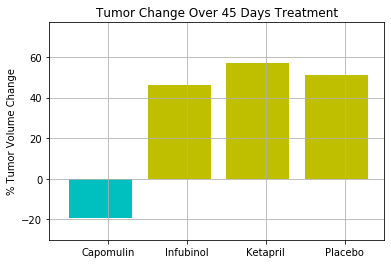

In [150]:
testdrugs = tumortable.keys()

summary_bar = plt.subplot()
x_axis = np.arange(0, len(testdrugs))
tick_locations = []
for x in x_axis:
   tick_locations.append(x + 0.5)
plt.xticks(tick_locations, testdrugs)
colors = []
for value in tumortable:
   if value >= 0 :
       colors.append('y')
   else:
       colors.append('c')
#Plot
percent_change = summary_bar.bar(x_axis, tumortable, color=colors, align="edge")
plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.25, len(testdrugs))
plt.ylim(-30, max(tumortable) + 20)
plt.grid()
plt.show()

In [ ]:
#Three Observable trends:
    #Over time, Capomulin is the only drug that reduces the tumor volume. 
    #For the other drugs, the tumor volume increases, meaning they are not effective.  
    #On the other hand, Capomulin shows an efficient result by decreasing tumor size. 
    
    #When using Ketapril, the tumor volume increased even more than when using placebo. 
    #This means that Ketapril has an opposite effect to the desired decrease in tumor. 
    
    #Capomulin has the best survival rate compared to the other three drugs. 
    #This means it produces the best desired effect on tumor treatment. 